/usr/local/lib/python3.6/dist-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


Data: [ -45.5 -119.  -157.  ... -915.5 -631.  -550.5]
Sampling rate: 8000
Durasi: 33.529625 seconds
Amplitude terendah: -28882.5
Amplitude terendah: 28805.0
Rata-rata energi: 21319139.248979446
Zero Cross Rate: 0.0


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


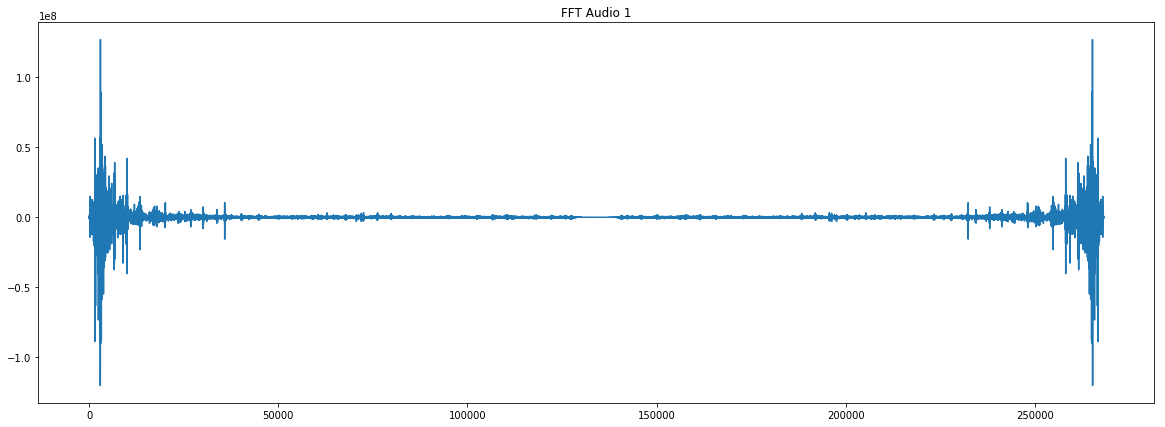

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft
import scipy.signal

def avgEnergy(data):
  return np.mean(data**2)

def zeroCR(data):
  sign=[np.where(i>=0,1,-1)for i in data]
  total=0
  for i in range(1,len(sign)):
    total+=sign[i]-sign[i-1]
  return total/(2*len(sign))

def DFT(data):
  x = np.asarray(data, dtype=float)
  N = x.shape[0]
  n = np.arange(N)
  k = n.reshape((N, 1))
  M = np.exp(-2j * np.pi * k * n / N)
  return np.dot(M, x)

rate,data=wavfile.read('sound.wav') 
mono_data = data.sum(axis=1) / 2
print ('Data:', mono_data)
print ('Sampling rate:', rate)
print ('Durasi:', mono_data.size/rate, 'seconds')
print ('Amplitude terendah:', min(mono_data))
print ('Amplitude terendah:', max(mono_data))
print ('Rata-rata energi:',avgEnergy(mono_data))
print ('Zero Cross Rate:',zeroCR(mono_data))




# vect=np.fft.fft(mono_data)
plt.figure(figsize=(20,7))
plt.title("FFT Audio 1")
plt.plot(vect)
# plt.xlabel('Time [Milisec]')
# plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(20,7))

# plt.figure(figsize=(20,7))
# plt.title("Audio 1")
# plt.plot(mono_data)
# # plt.xlabel('Time [Milisec]')
# # plt.ylabel('Amplitude')
# plt.show()


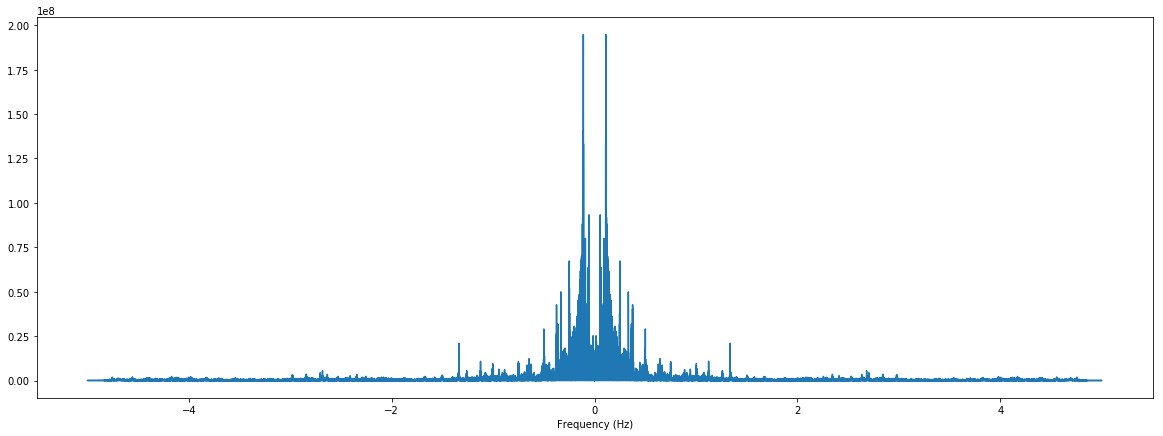

In [ ]:
n=mono_data.size
freq = np.fft.fftfreq(n, d=0.1)
datafft = vect
#Get the absolute value of real and complex component:
fftabs = abs(datafft)
freqs = freq
plt.figure(figsize=(20,7))
plt.xlabel( 'Frequency (Hz)' )
plt.plot(freqs,fftabs)


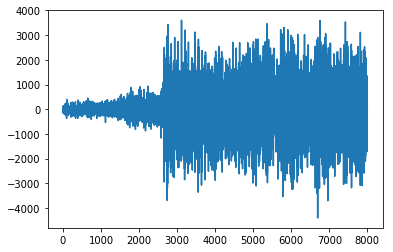

In [ ]:
plt.plot(mono_data[:1*rate]) #plot first 1 second


In [ ]:
-np.sum(mono_data*np.log2(mono_data))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log2
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in multiply
  """Entry point for launching an IPython kernel.


nan

In [ ]:
# feature extractoring and preprocessing data
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report

#Keras
import keras

import warnings
warnings.filterwarnings('ignore')

In [ ]:
SOUND_SAMPLE_LENGTH = 30000

HAMMING_SIZE = 100
HAMMING_STRIDE = 40
for i in range(0, SOUND_SAMPLE_LENGTH, HAMMING_STRIDE):
  if i + HAMMING_SIZE <= SOUND_SAMPLE_LENGTH - 1:
      y, sr = librosa.load("sound.wav", offset=i / 1000.0, duration=HAMMING_SIZE / 1000.0)
x, sr = librosa.load("sound.wav", duration=HAMMING_SIZE / 1000.0)

x.shape,y.shape

((2205,), (2205,))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
cmap = plt.get_cmap('inferno')

plt.figure(figsize=(10,10))
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
os.listdir(f'drive/My Drive/genres')
for g in genres:
  pathlib.Path(f'img_data/{g}').mkdir(parents=True, exist_ok=True)
  for filename in os.listdir(f'drive/My Drive/genres/{g}'):
    songname = f'drive/My Drive/genres/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=5)
    plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
    plt.axis('off');
    plt.savefig(f'img_data/{g}/{filename[:-3].replace(".", "")}.png')
    plt.clf()

In [ ]:

# header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate melspectogram'
header = 'filename chroma_stft spectral_centroid spectral_contrast'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()  #daftar header pada file csv nantinya

file = open('data.csv', 'w', newline='') #membuat file .csv
with file:
  writer = csv.writer(file)
  writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()  #daftar genre sesuai dataset
for g in genres: 
  for filename in os.listdir(f'drive/My Drive/genres/{g}'):  #mengakses folder genre
    songname = f'drive/My Drive/genres/{g}/{filename}'  #mengakses nama file pada folder genre
    y, sr = librosa.load(songname, mono=True, duration=15)  #membaca data audio
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)  #ekstraksi fitur
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)  #ekstraksi fitur
    spec_cont = librosa.feature.spectral_contrast(y=y, sr=sr)
#     spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)  #ekstraksi fitur
#     rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)  #ekstraksi fitur
#     zcr = librosa.feature.zero_crossing_rate(y)  #ekstraksi fitur
#     S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)
#     rmse = librosa.feature.rmse(y=y)  #ekstraksi fitur
    mfcc = librosa.feature.mfcc(y=y, sr=sr)  #ekstraksi fitur

        #hitung rata-rata setiap fitur
    to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(spec_cent)} {np.mean(spec_cont)}'
#     to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)} {np.mean(S)}'
    for e in mfcc:
      to_append += f' {np.mean(e)}'
    to_append += f' {g}'
    file = open('data.csv', 'a', newline='')
    with file:
      writer = csv.writer(file)
      writer.writerow(to_append.split())
      

In [ ]:
data = pd.read_csv('data.csv') #membaca file csv
data = data.drop(['filename'],axis=1)  #menghapus kolom pertama yaitu filename
genre_list = data.iloc[:, -1]  #mengambil daftar kelas atau genre
encoder = LabelEncoder()  
y = encoder.fit_transform(genre_list)  #melabeli setiap kelas
data.head()

,chroma_stft,spectral_centroid,spectral_contrast,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.342811,1734.019165,20.578543,-119.268332,124.263955,-18.114180,42.931201,-7.590426,19.728445,-13.712301,16.910312,-13.107291,11.946439,-8.377892,10.284315,-4.393649,6.498004,-6.198834,0.338573,-1.975179,0.401629,-2.512299,1.744851,blues
1,0.353785,1461.033162,20.547877,-218.322389,128.469920,1.964853,36.031805,5.684306,20.434209,-8.166456,22.307706,-7.699074,11.195829,-1.722380,8.578834,-2.488739,3.698845,-5.235972,1.334799,0.682403,-0.386745,-1.516038,-0.069052,blues
2,0.379761,1520.413179,21.947912,-93.537479,142.725082,-27.052637,34.540743,-17.325408,25.931598,-12.811280,11.018903,-11.504010,7.710283,-13.371824,4.331266,-8.087323,-2.520971,-8.545268,2.867476,-6.943338,-1.803130,-1.949560,-2.703131,blues
3,0.400690,1012.677732,21.232965,-210.154102,154.142257,4.292124,25.378512,3.748969,10.982045,-3.661312,10.001517,1.800369,8.853750,0.579476,5.199751,-2.864441,-0.184004,-2.646467,0.012312,-0.595061,0.973758,0.031196,-2.011631,blues
4,0.301047,1960.408777,22.038454,-153.224422,120.060595,-36.767043,23.648773,-34.246537,12.519146,-23.002961,1.586676,-12.577858,2.547527,-14.651413,-2.854098,-5.551297,-7.178292,-10.078622,-3.749913,-6.581189,-0.022142,-4.733184,-13.629349,blues


In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #membagi data ke dalam train dan test

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],))) #input terhadap hidden layer 1

model.add(layers.Dense(32, activation='relu')) #hidden layer 1 terhadap hidden layer 2

# model.add(layers.Dense(16, activation='relu')) #hidden layer 1 terhadap hidden layer 2

model.add(layers.Dense(10, activation='softmax'))  #hidden layer 2 terhadap output

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #menentukan optimizer dan fungsi loss

In [ ]:
result=model.fit(X_train,
          y_train,
          epochs=400,
          batch_size=35,
          validation_data=(X, y))


Train on 800 samples, validate on 1000 samples
Epoch 1/400
800/800 [==============================] - 3s 4ms/step - loss: 2.1386 - acc: 0.2425 - val_loss: 1.9317 - val_acc: 0.3450
Epoch 2/400
800/800 [==============================] - 0s 114us/step - loss: 1.8225 - acc: 0.3650 - val_loss: 1.6925 - val_acc: 0.4130
Epoch 3/400
800/800 [==============================] - 0s 118us/step - loss: 1.6129 - acc: 0.4425 - val_loss: 1.5185 - val_acc: 0.4710
Epoch 4/400
800/800 [==============================] - 0s 119us/step - loss: 1.4581 - acc: 0.4913 - val_loss: 1.3887 - val_acc: 0.5170
Epoch 5/400
800/800 [==============================] - 0s 113us/step - loss: 1.3396 - acc: 0.5375 - val_loss: 1.2954 - val_acc: 0.5580
Epoch 6/400
800/800 [==============================] - 0s 108us/step - loss: 1.2543 - acc: 0.5900 - val_loss: 1.2230 - val_acc: 0.5870
Epoch 7/400
800/800 [==============================] - 0s 119us/step - loss: 1.1788 - acc: 0.6000 - val_loss: 1.1588 - val_acc: 0.6120
Epoch 8/40

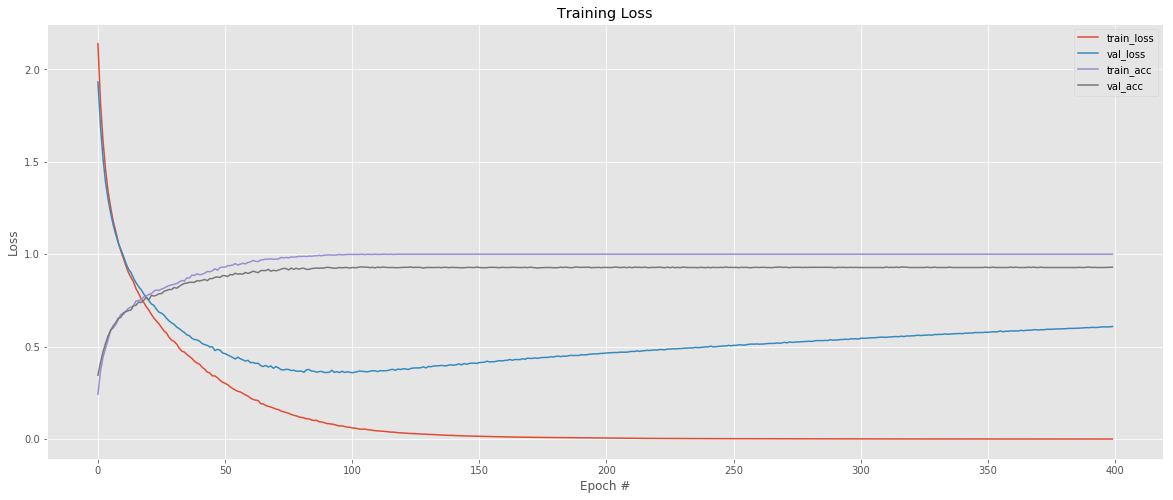

200/200 [==============================] - 0s 74us/step
test_acc:  0.65


In [ ]:
N = np.arange(0, 400)
plt.style.use("ggplot")
plt.figure(figsize=(20,8))
plt.plot(N, result.history["loss"], label="train_loss")
plt.plot(N, result.history["val_loss"], label="val_loss")
plt.plot(N, result.history["acc"], label="train_acc")
plt.plot(N, result.history["val_acc"], label="val_acc")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

In [ ]:
predictions = model.predict(X_test)
pred=[]
for i in predictions:
  pred.append(np.argmax(i))

pred=np.asarray(pred)
print("Prediksi:\n",pred.T)
print()
print("Target:\n",y_test)

c=0
ind=[]
for i in range(len(y_test)):
  if pred[i]==y_test[i]:
    c+=1
    ind.append(i)
print("Jumlah benar:",c,"\n",ind)

Prediksi:
 [3 7 1 3 3 5 7 9 6 0 1 3 6 4 5 6 6 7 8 8 6 9 2 2 0 0 2 4 9 9 3 0 7 2 1 3 8
 3 8 2 5 1 0 8 2 2 1 1 9 8 2 8 7 9 5 3 6 3 6 9 3 5 8 2 9 4 9 5 8 5 7 1 8 7
 7 6 1 7 4 9 6 6 1 0 8 6 9 9 5 3 1 0 1 0 7 0 0 1 9 5 5 1 3 7 7 5 3 3 2 3 7
 3 4 5 4 9 7 1 8 6 5 2 4 5 5 3 0 1 1 5 5 3 0 0 7 6 7 6 7 5 8 9 8 5 7 4 8 2
 7 7 9 0 7 4 2 6 4 9 1 0 3 4 9 7 4 4 0 7 6 3 7 1 0 0 4 8 0 6 1 1 1 7 5 1 2
 1 8 5 2 5 1 5 1 2 8 3 6 5 8 3]

Target:
 [2 7 1 4 3 2 7 7 6 0 1 9 6 4 5 6 6 7 3 4 9 9 2 2 0 6 2 4 5 9 3 0 7 4 1 6 8
 4 8 2 0 5 0 8 2 2 1 1 1 8 2 2 7 9 5 3 6 8 6 3 3 8 7 2 0 4 9 3 7 5 7 1 8 7
 7 6 1 7 4 3 6 6 1 0 4 4 6 6 4 3 1 0 1 9 4 0 9 1 0 5 5 5 3 7 7 5 7 9 2 3 8
 3 4 5 4 9 7 1 3 6 5 2 4 7 5 3 0 1 1 5 5 8 9 2 3 6 9 6 7 5 4 9 8 5 9 3 4 5
 7 7 2 8 9 4 2 6 4 4 1 9 4 9 9 7 4 4 0 7 6 0 4 5 9 0 8 8 2 6 9 1 1 7 5 1 2
 5 8 5 2 5 1 5 1 2 0 7 3 5 4 7]
Jumlah benar: 130 
 [1, 2, 4, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 26, 27, 29, 30, 31, 32, 34, 36, 38, 39, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54

In [ ]:
def DFT_slow(x):
  x=np.asarray(x,dtype=float)
  N=x.shape[0]
  n=np.arange(N)
  k = n.reshape((N, 1))
  M = np.exp(-((1j * np.pi * k * n)/(N)) )
  return np.dot(M,x)

test=np.array([0,0.707,1,0.707,0,-0.707,-1,-0.707])
dft=DFT_slow(test)

print(dft)
print()
print(np.fft.fft(test))

[ 0.00000000e+00+0.00000000e+00j  3.26169359e+00+1.72734815e-16j
  5.94232694e-16-3.99969798e+00j -2.17946485e+00-7.65145121e-16j
 -1.18438570e-33+2.44929360e-16j -6.48962277e-01-8.89601122e-16j
 -2.93795404e-17+3.02022804e-04j -4.33266470e-01-1.72347060e-15j]

[ 0.00000000e+00+0.00000000e+00j -2.22044605e-16-3.99969798e+00j
  0.00000000e+00+0.00000000e+00j -2.22044605e-16+3.02022804e-04j
  0.00000000e+00+0.00000000e+00j  2.22044605e-16-3.02022804e-04j
  0.00000000e+00+0.00000000e+00j  2.22044605e-16+3.99969798e+00j]
